In [5]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from keras.datasets import imdb

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [9]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17473536/17464789 [==============================] - 5s 0us/step


In [11]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [15]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total para

In [16]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5,
                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 50s 2ms/step - loss: 0.4556 - acc: 0.7652 - val_loss: 0.3418 - val_acc: 0.8510
Epoch 2/5
25000/25000 [==============================] - 48s 2ms/step - loss: 0.2948 - acc: 0.8769 - val_loss: 0.3327 - val_acc: 0.8536
Epoch 3/5
25000/25000 [==============================] - 47s 2ms/step - loss: 0.2482 - acc: 0.9000 - val_loss: 0.3343 - val_acc: 0.8531
Epoch 4/5
25000/25000 [==============================] - 47s 2ms/step - loss: 0.2153 - acc: 0.9154 - val_loss: 0.3475 - val_acc: 0.8511
Epoch 5/5
25000/25000 [==============================] - 47s 2ms/step - loss: 0.1808 - acc: 0.9314 - val_loss: 0.3833 - val_acc: 0.8460


In [19]:
print("Accuracy : %.4f" % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 12s 498us/step
Accuracy : 0.8460


In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

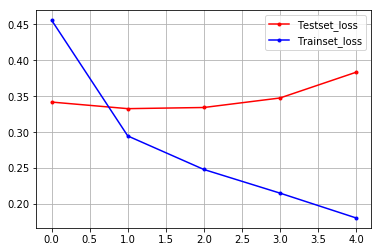

In [24]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', 
        c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', 
        c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.show()